In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the data
df = pd.read_csv('student_data.csv')

In [5]:
# information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4000 non-null   int64  
 1   Application mode                                4000 non-null   int64  
 2   Application order                               4000 non-null   int64  
 3   Course                                          4000 non-null   int64  
 4   Daytime/evening attendance	                     4000 non-null   int64  
 5   Previous qualification                          4000 non-null   int64  
 6   Previous qualification (grade)                  4000 non-null   float64
 7   Nacionality                                     4000 non-null   int64  
 8   Mother's qualification                          4000 non-null   int64  
 9   Father's qualification                   

In [9]:
# Check for missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
# Convert categorical variables to numerical
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

In [13]:
# Handle any missing values 
df = df.dropna()

In [15]:
# Split features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [17]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Calculate correlations
corr_matrix = df.corr()

C:\Users\JBC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\JBC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


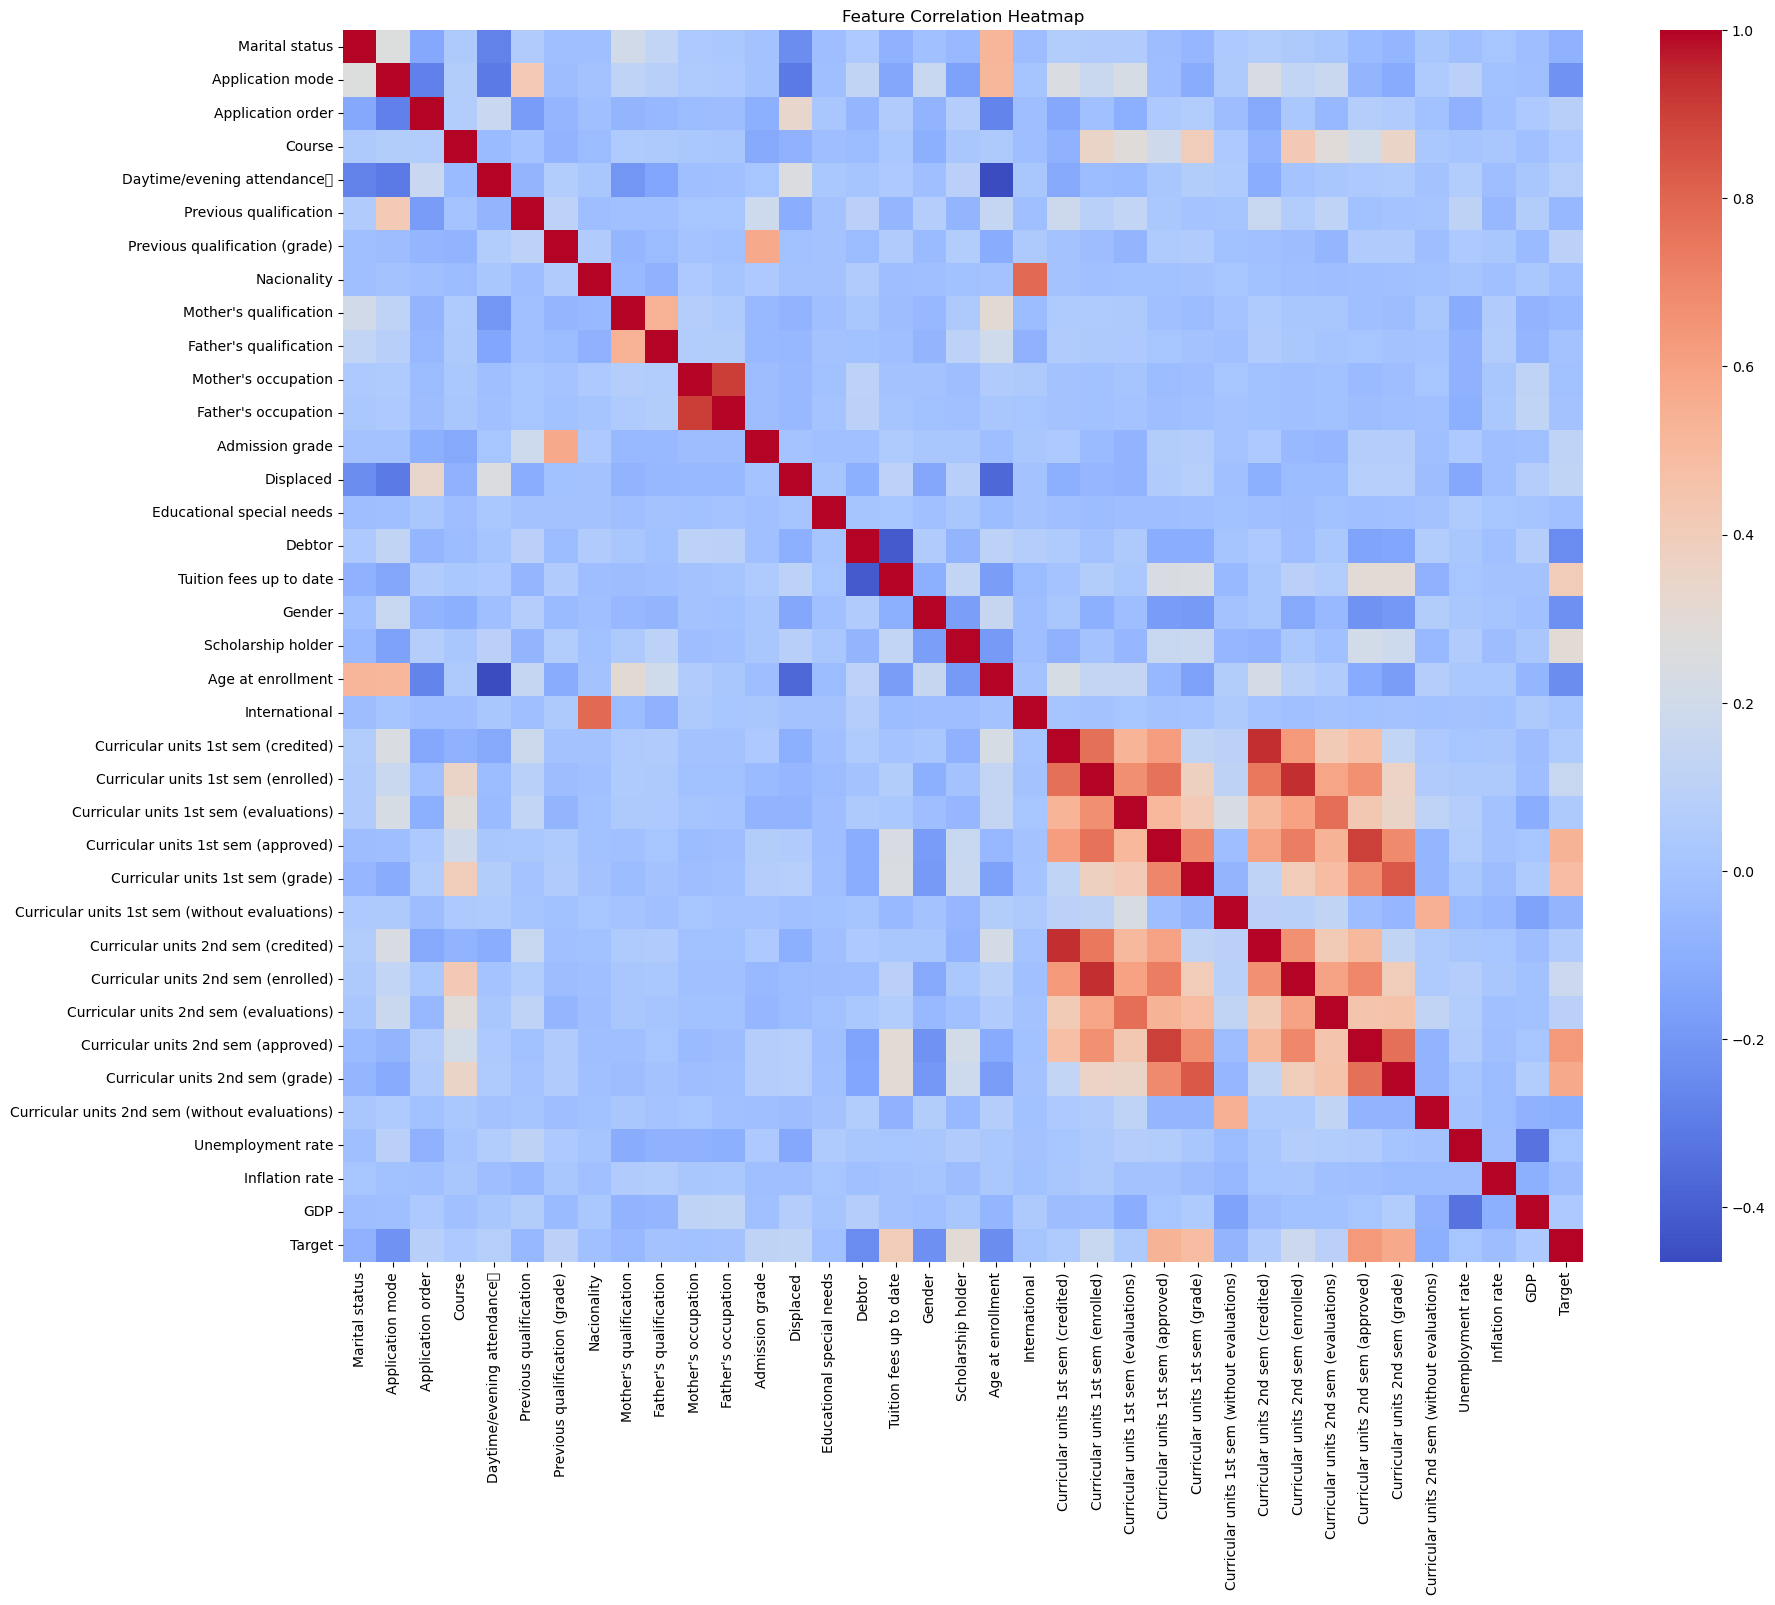

In [21]:
# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\JBC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


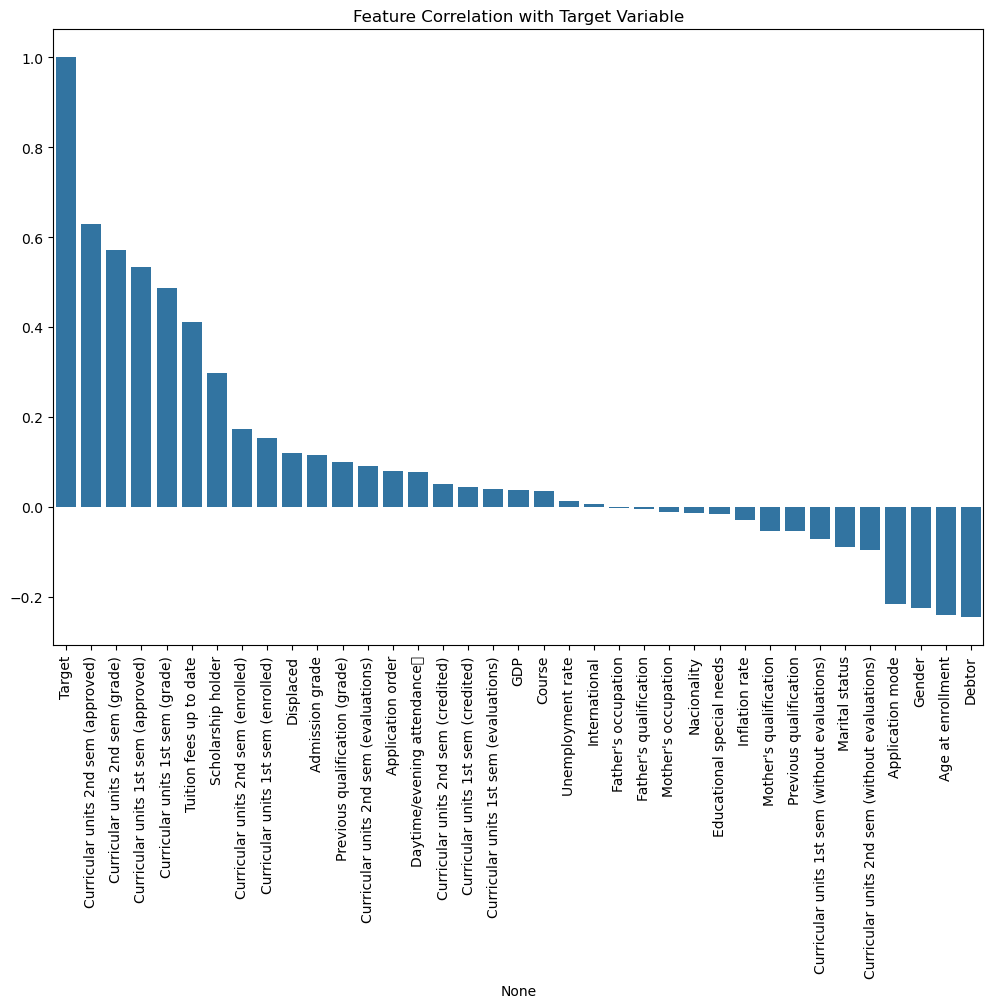

In [23]:
# Plot correlation with target variable
plt.figure(figsize=(12, 8))
corr_with_target = corr_matrix['Target'].sort_values(ascending=False)
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Target Variable')
plt.show()

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Probabilistic model: Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
# Tree-based model: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Distance-based model: K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Ensemble method: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
models = [gnb, dt, knn, rf]
model_names = ['Naive Bayes', 'Decision Tree', 'KNN', 'Random Forest']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    # Confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(cm)
    print()

Naive Bayes - Mean Accuracy: 0.6815 (+/- 0.0325)
Naive Bayes - Confusion Matrix:
[[182  26  60]
 [ 31  29  74]
 [ 32  32 334]]

Decision Tree - Mean Accuracy: 0.6755 (+/- 0.0341)
Decision Tree - Confusion Matrix:
[[188  44  36]
 [ 43  53  38]
 [ 28  55 315]]

KNN - Mean Accuracy: 0.7100 (+/- 0.0328)
KNN - Confusion Matrix:
[[200  24  44]
 [ 30  39  65]
 [ 19  39 340]]

Random Forest - Mean Accuracy: 0.7750 (+/- 0.0245)
Random Forest - Confusion Matrix:
[[208  19  41]
 [ 45  43  46]
 [ 16  15 367]]



The mean method of standard divation is used for accuracy to ensure that performance comparision between models is fair and not overly dependent on one particular split of dataset.

Random Forest has the highest mean accuracy with low variance, demonstrating its robustness and consistency across different splits of the data.

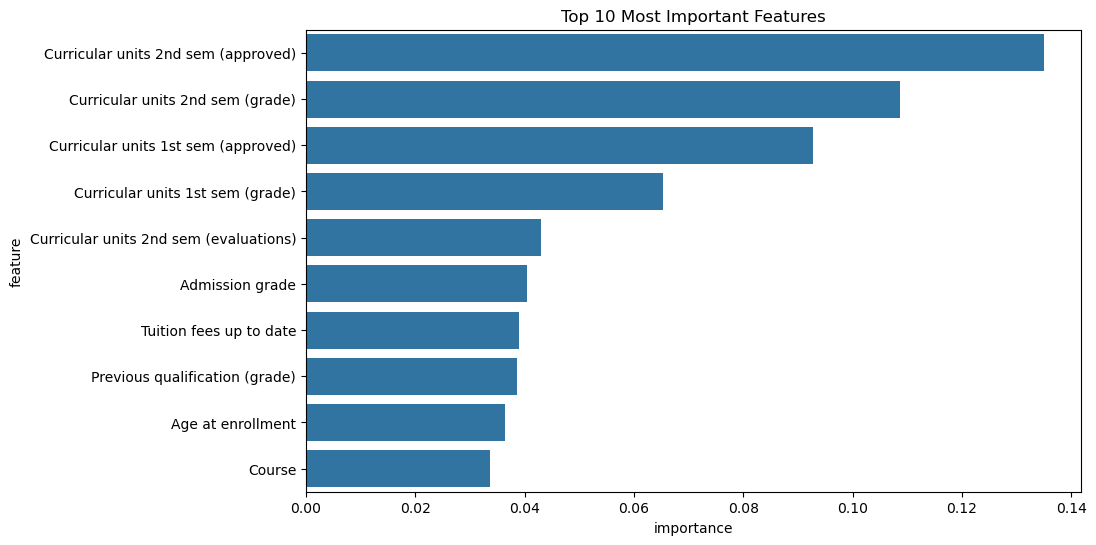

In [37]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

In [63]:
import os
import pickle

In [65]:
random_forest_model = rf
save_dir = r"F:/mpl"
os.makedirs(save_dir, exist_ok=True)
file_path = os.path.join(save_dir, "random_forest_model.pkl")
with open(file_path, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved successfully to {file_path}")

Random Forest model saved successfully to F:/mpl\random_forest_model.pkl


In [67]:
file_path = r"F:/mpl/random_forest_model.pkl"


with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("Random Forest model loaded successfully.")

Random Forest model loaded successfully.
